# Clean and Analyze Employee Exit Surveys
We will work with exit surveys from employees of the [Department of Ecudation, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland) (DETE) and the Technical and Further Education (TAFE) in Queensland, Australia.

The dataset of the DETE may be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). As for the TAFE exit survey dataset, it is no longer available online.

We are to play the role of a data analyst and pretend our stakeholders want to know the following:
- Are the employees who only worked for the institutes for a short period of time resignijng due to some kind of dissattisfaction? What about employees who have been here longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the the results for both surveys to answer these questions. Even though both used the same survey template, one of them customized some of the answers.

## Exploring the Dataset
Below is a preview of a couple of columns we will work with from the `dete_survey.csv`:
- `ID`: An id used to identify the participant of the survey,
- `SeparationType`: The reason why the person's employment ended,
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:
- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

Given that this is an experimentation project to showcase cleaning skills, we will work  with a data dictionary made by our knowledge, given that there is no project manager to verify the data dictionary with.

We must start by reading the datasets into pandas and exploring them.


In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

### DETE Survey Exploration
We will start by exploring the DETE survey dataset and its results.

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

The total number of entries is 822. Many columns appear to have `null` or missing values. The dataset contains 55 columns (without including the index). As for the datatypes, 18 columns contain `bool` (boolean) type values, 1 column has `int` (integer) type values, and 37 `string` values.

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The data describes the reason as for why a person resigned or was removed from his position at the company in the `Separation Type` and many other important data columns that could help us with our analysis like `Ill Health`, `Dissatisfaction with the department`, etc. Repeated columns contain `NaN` values, meaning missing data.

Now, let us analyze which columns contain null values as follows.

In [4]:
missing_dete_val_cols = dete_survey.isnull().sum()[dete_survey.isnull().sum() > 0]
missing_dete_val_cols

Position                         5
Classification                 367
Business Unit                  696
Employment Status                5
Professional Development        14
Opportunities for promotion     87
Staff morale                     6
Workplace issue                 34
Physical environment             5
Worklife balance                 7
Stress and pressure support     12
Performance of supervisor        9
Peer support                    10
Initiative                       9
Skills                          11
Coach                           55
Career Aspirations              76
Feedback                        30
Further PD                      54
Communication                    8
My say                          10
Information                      6
Kept informed                    9
Wellness programs               56
Health & Safety                 29
Gender                          24
Age                             11
Aboriginal                     806
Torres Strait       

Let us calculate the percentage of data that is missing from each column to foresee modification impact.

In [5]:
missing_dete_val_percentages = missing_dete_val_cols.apply(lambda x: (x / 822) * 100)
missing_dete_val_percentages

Position                        0.608273
Classification                 44.647202
Business Unit                  84.671533
Employment Status               0.608273
Professional Development        1.703163
Opportunities for promotion    10.583942
Staff morale                    0.729927
Workplace issue                 4.136253
Physical environment            0.608273
Worklife balance                0.851582
Stress and pressure support     1.459854
Performance of supervisor       1.094891
Peer support                    1.216545
Initiative                      1.094891
Skills                          1.338200
Coach                           6.690998
Career Aspirations              9.245742
Feedback                        3.649635
Further PD                      6.569343
Communication                   0.973236
My say                          1.216545
Information                     0.729927
Kept informed                   1.094891
Wellness programs               6.812652
Health & Safety 

Columns like `Aboriginal`, `Torres Strait`, `South Sea`, `NESB`, `Disability`, and `Business Unit` contain about more than 50% of missing values. The rest contain a smaller percentage of missing values. Keeping in mind that we are to look for columns that can inform us about experience and personal opinions just as dates to compare relations between experience and duration in the company, it would be wise to analyze if we should drop these columns with such a high percentage of missing data, and how this action may impact our analysis.

To foresee the potential justification for this action we need to explore the values in each column.

In [6]:
dete_survey["Aboriginal"].value_counts(dropna=False)

Aboriginal
NaN    806
Yes     16
Name: count, dtype: int64

In [7]:
dete_survey["Torres Strait"].value_counts(dropna=False)

Torres Strait
NaN    819
Yes      3
Name: count, dtype: int64

In [8]:
dete_survey["South Sea"].value_counts(dropna=False)

South Sea
NaN    815
Yes      7
Name: count, dtype: int64

In [9]:
dete_survey["NESB"].value_counts(dropna=False)

NESB
NaN    790
Yes     32
Name: count, dtype: int64

In [10]:
dete_survey["Disability"].value_counts(dropna=False)

Disability
NaN    799
Yes     23
Name: count, dtype: int64

In [11]:
dete_survey["Business Unit"].value_counts(dropna=False)

Business Unit
NaN                                           696
Education Queensland                           54
Information and Technologies                   26
Training and Tertiary Education Queensland     12
Other                                          11
Human Resources                                 6
Corporate Strategy and Peformance               5
Early Childhood Education and Care              3
Policy, Research, Legislation                   2
Infrastructure                                  2
Corporate Procurement                           1
Pacific Pines SHS                               1
Finance                                         1
Calliope State School                           1
Indigenous Education and Training Futures       1
Name: count, dtype: int64

Most of theese columns describe locations in Australia. Therefore, we might be able to drop the columns making reference to locations like `Aboriginal`, `Torres Strait`, and `South Sea` without affecting the end goal of the analysis.

Now, let us consider the `NESB` column separately and explore its content in comparison to the rest of the values in the other rows.

In [12]:
dete_survey.loc[dete_survey["NESB"] == "Yes"]

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
75,76,Contract Expired,2012,2010,2012,Public Servant,A01-A04,Central Office,Information and Technologies,Temporary Full-time,...,A,A,A,Male,26-30,NaN,NaN,NaN,NaN,Yes
83,84,Contract Expired,2012,2011,2012,Public Servant,A01-A04,Metropolitan,NaN,Temporary Full-time,...,SA,D,A,Female,41-45,NaN,NaN,NaN,NaN,Yes
94,95,Voluntary Early Retirement (VER),2012,1973,1976,Teacher,Primary,South East,NaN,Permanent Full-time,...,N,D,D,Female,51-55,NaN,NaN,NaN,NaN,Yes
125,126,Age Retirement,2012,1991,1991,Cleaner,NaN,Far North Queensland,NaN,Permanent Part-time,...,SA,M,A,Male,61 or older,NaN,NaN,NaN,NaN,Yes
152,153,Other,2012,1993,2012,Public Servant,AO5-AO7,Central Office,Training and Tertiary Education Queensland,Permanent Full-time,...,D,N,SD,Female,36-40,NaN,NaN,NaN,NaN,Yes
153,154,Termination,2012,2002,2008,Public Servant,AO5-AO7,Central Office,Education Queensland,Permanent Full-time,...,A,D,A,Female,36-40,NaN,NaN,NaN,NaN,Yes
174,175,Voluntary Early Retirement (VER),2012,2007,2007,Public Servant,A01-A04,Central Office,Other,Permanent Full-time,...,N,N,N,Female,31-35,NaN,NaN,NaN,NaN,Yes
217,218,Voluntary Early Retirement (VER),2013,1995,1995,Teacher,Secondary,South East,NaN,Permanent Part-time,...,A,A,A,Male,56-60,NaN,NaN,NaN,NaN,Yes
246,247,Voluntary Early Retirement (VER),2012,1975,1988,Public Servant,A01-A04,South East,NaN,Permanent Full-time,...,A,A,N,Female,51-55,NaN,NaN,NaN,NaN,Yes


As for columns like `NESB` (Non-English Speaking Background) and `Disability`, they also contain a smaller variation of values in their rows. However, in this case, keeping those columns could be helpful instead of dropping them. The reason is that we are looking for a relationship (if there is any) between resignation and a bad experience. A NESB could be a reason in terms of communication as for why people resign
- Do they have communication issues?
- Is there not enough inclusion for disabled users?

We will only know once we clean the data and perform an analysis.

As for the `NESB` column, one acceptable action is to change the `NaN` values to "No". Surveyed people might have left a blank space instead of answering "No" in cases when asking for disabilities and NESB. Therefore, the same action may apply to the `Disability` column.

Another value substtitution action could be to change the answers of the survey to a more readable syntaxis, instead of using `N`, `D`, `SA` or `M` as asnwers.

### TAFE Survey Exploration
We will proceed to explore the TAFE survey.

In [13]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

There are 702 total entries and 72 columns. 70 columns have `string` type values and 2 of them `float` type values.

There are 702 total entries and 72 columns. 70 columns have `string` type values and 2 of them `float` type values.

In [14]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


It is visible at first sight that the survey designed for both datasets is the same one. Some values are missing too in this dataset and respresented as missing in more than one manner. The `Record ID` column uses scientifical notation for numeric values' representation.

Another important observation is the long titles being used for the column names. Even though they are quite descriptive, they are not practical to use when performing analysis operations. Abbreviating the titles of the columns would be advisable to make search and indexing operations more practical.

In [15]:
missing_tafe_val_cols = tafe_survey.isnull().sum()[tafe_survey.isnull().sum() > 0]
missing_tafe_val_cols

CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
Contributing Factors. Career Move - Public Sector                            265
Contributing Factors. Career Move - Private Sector                           265
Contributing Factors. Career Move - Self-employment                          265
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 69, dtype: int64

69 columns out of the 72 in total have missing values in the TAFE survey dataset.

In [16]:
missing_tafe_percentage = missing_tafe_val_cols.apply(lambda x: (x / 702) * 100)
missing_tafe_percentage.describe()

count    69.000000
mean     20.589207
std      12.727339
min       0.142450
25%      13.247863
50%      15.099715
75%      21.225071
max      83.903134
dtype: float64

In [17]:
missing_tafe_percentage.sort_values()

Reason for ceasing employment                                                                       0.142450
CESSATION YEAR                                                                                      0.997151
Induction. Did you undertake Workplace Induction?                                                  11.823362
InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had    12.393162
InstituteViews. Topic:7. Management was generally supportive of me                                 12.535613
                                                                                                     ...    
Contributing Factors. Interpersonal Conflict                                                       37.749288
Contributing Factors. Maternity/Family                                                             37.749288
Contributing Factors. Ill Health                                                                   37.749288
InductionInfo. Topi

Most of the columns have less than 50% missing values per column. The column with the highest percentage of missing values is `Main Factor. Which of these was the main factor for leaving?` with 83.90%. Let us explore the column and see what the values contained withing are.

In [18]:
tafe_survey["Main Factor. Which of these was the main factor for leaving?"].value_counts(dropna=False)

Main Factor. Which of these was the main factor for leaving?
NaN                                         589
Dissatisfaction with %[Institute]Q25LBL%     23
Job Dissatisfaction                          22
Other                                        18
Career Move - Private Sector                 16
Interpersonal Conflict                        9
Career Move - Public Sector                   8
Maternity/Family                              6
Career Move - Self-employment                 4
Ill Health                                    3
Study                                         2
Travel                                        2
Name: count, dtype: int64

589 entries contain `NaN` values. The rest describe the main factors for leaving the institution. It would not be advisable to drop the column, given the important data relating to experience in the institution, even though the amount of present data is significantly low.

Let us explore other columns' values to see any relevant factors and analyze potential future actions.

In [19]:
tafe_survey["InductionInfo. Topic:Did you undertake a Corporate Induction?"].value_counts()

InductionInfo. Topic:Did you undertake a Corporate Induction?
Yes    232
No     200
Name: count, dtype: int64

In [20]:
tafe_survey["InstituteViews. Topic:7. Management was generally supportive of me"].value_counts()

InstituteViews. Topic:7. Management was generally supportive of me
Agree                267
Strongly Agree       135
Neutral              104
Disagree              66
Strongly Disagree     37
Not Applicable         5
Name: count, dtype: int64

In [21]:
tafe_survey["Contributing Factors. Ill Health"].value_counts()

Contributing Factors. Ill Health
-             403
Ill Health     34
Name: count, dtype: int64

A potential action to follow in the future is the replacement of the answers in some columns. As an example, this column's title, `Contributing Factors. Ill Health` describes wether "Ill Health" was a contributing factor to resignation or not. Changing the title to a shorter one could help and avoid being redundant by also modifying the answers; `-` could become `No` and `Ill Health` remain like that or become `Yes`. Either change is valid to make the dataset readable in an easier manner.

## Identify Misssing Values and Drop Unnecessary Columns
These are some additional observations from the last section on data exploration:
- The `dete_survey` dataframe contains `Not Stated` values that indicate values are missing, but they aren't represented as `NaN`.
- Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To follow up, we will change some values to `NaN` with the help of the `pd.read_csv()` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, we will drop columns that are not needed for our analysis.

First, we will proceed with the `dete_survey` dataset.

In [22]:
dete_survey = pd.read_csv("dete_survey.csv", na_values=["Not Stated"])
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

Now, let us drop drop some columns from each dataframe, focusing on the columns we will not need for our analysis.

In [23]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

It is time to do the same with the `tafe_survey` dataset.

In [24]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

We removed the columns that are not mostly needed for our analysis. The ones left on both dataframes are pretty similar. Even though some the columns' remainance may be questionable, most of the non-useful have been removed.

## Clean Column Names
Both dataframes contain many of the same columns with different names and lengths. Below we can find a comparison of columns we are interested for our final analysis:

| dete_survey | tafe_survey | Definition |
|:-------------|:--------------|:----------------------------------------|
|ID|Record ID|An id used to identify the participant of the survey|
|SeparationType|Reason for ceasing employment|The reason why the participant's employment ended|
|Cease Date|CESSATION YEAR|The year or month the participant's employment ended|
|DETE Start Date||The year the participant began employment with the DETE|
||LengthofServiceOverall. Overall Length of Service at Institute (in years)|The length of the person's employment (in years)|
|Age|CurrentAge. Current Age|The age of the participant|
|Gender|Gender. What is your Gender?|The gender of the participant|

Given that part of our end goal is to combine both dataframes/datasets we need to standardize the column names. We will start by doing the following in the `dete_survey_updated` dataset:
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores `_`.

In [25]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace("\\s+", " ").str.replace(" ", "_")
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

Following up, we need to rename some of the columns in the `tafe_survey_updated` dataset.

These are the resulting values for the columns we are going to use for our analysis. Also, this is the reason por the partial cleaning and stardarization. We are cleaning specifically with our end goal in mind.

In [26]:
mapper = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey_updated = tafe_survey_updated.rename(columns=mapper)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   702 non-null    float64
 1   Institute                                            702 non-null    object 
 2   WorkArea                                             702 non-null    object 
 3   cease_date                                           695 non-null    float64
 4   separationtype                                       701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   437 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  437 non-null    object 
 8   Contributing Factors. Ill Health                     437 non-null    o

These are the resulting values for the columns we are going to use for our analysis. Also, this is the reason por the partial cleaning and stardarization. We are cleaning specifically with our end goal in mind.

In [27]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [28]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filter the Data
We have renamed the columns we will need for our analysis. Next, let us remove more of the data we do not need.

Remember that our end goal is to answer the following question:
- Are the employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Looking at the unique values in the `separationtype` columns in each dataframe, we will see that each contains a couple of different separation types, the rest remain the samw with minor variations.

For this project, we will only analyze survey respondents who _resgined_, so their separation type contains the string 'Resignation'.

Note that `dete_survey_updated` dataframe contains multiple separation types with the string 'Resignation':
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

We will have to account for each of these variations so we do not unintentionally drop data."

In [29]:
dete_survey_updated["separationtype"].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [30]:
tafe_survey_updated["separationtype"].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

First, we need to filter `dete_survey_updated` to obtain all the data containing any type of 'Resignation'.

In [31]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains("Resignation")].copy()
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


Following up, we will do the same with `tafe_survey_updated`.

In [32]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"].copy()
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Verify the Data
Before proceeding into the cleaning and manipulation of the data, let us verify that there are no major inconsistencies (to the best of our knowledge) in the data. Using data that has been corrupted or that is bad can bring a project to become useless when analyzing it.

We will focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.
- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it would not make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it is also unlikely that the `dete_start_date` was before the year 1940.

In [33]:
# Extracting years of ceasing from the dates
dete_cease_dates = dete_resignations["cease_date"].value_counts().sort_index()
dete_cease_dates

cease_date
01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
Name: count, dtype: int64

In [34]:
# Separate years if date in format mm/yy, get the last element (the year)
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)
dete_resignations["cease_date"]

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
        ...  
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64

In [35]:
# Delete duplicates, get years' values for analysis and exploration
dete_years = pd.Series(dete_resignations["cease_date"].unique()).dropna()
dete_years

0    2012.0
1    2013.0
2    2010.0
3    2014.0
5    2006.0
dtype: float64

In [36]:
# Extract years' values
tafe_cease_dates = tafe_resignations["cease_date"].value_counts().sort_index()
tafe_years = tafe_cease_dates.index.unique()
tafe_years

Index([2009.0, 2010.0, 2011.0, 2012.0, 2013.0], dtype='float64', name='cease_date')

In [37]:
# Concatenate years data from tafe and dete for comparison
resignation_years = pd.concat([dete_years, tafe_years.to_series()], axis=1, ignore_index=True)
resignation_years.columns = ["dete_years", "tafe_years"]

<Axes: >

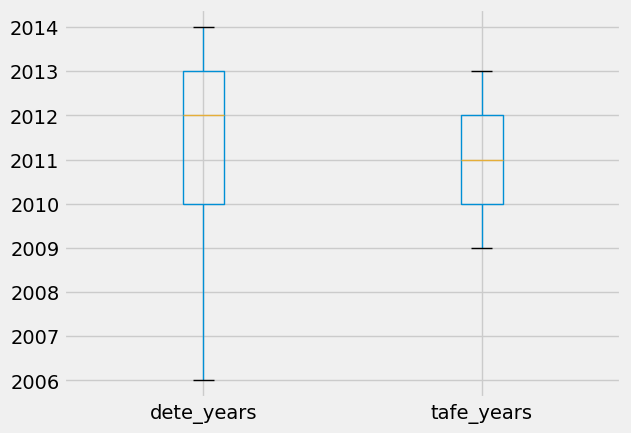

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

resignation_years.boxplot()

The current year is 2024, and these datasets have been updated in the current year too. Fortunately, this means that this datasets have no outliers referring to the years of resignation. We can safely use the data for our endgoal.

## Create a New Column: Institute Service
In the last exercises we have performed we could verify the following:
- There are not any major issues with the years.
- The years in each dataframe do not span quite the same number of yeats. 

Now that we have verified the years in the `dete_resignations` dataframe, we will use them to create a new column. Recall that our end goal is to answer the following question:
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their _years of service_.

In [39]:
# Calculation of years of service
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations["institute_service"].value_counts(dropna=False)

institute_service
NaN     38
5.0     23
1.0     22
0.0     20
3.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
8.0      8
13.0     8
20.0     7
15.0     7
10.0     6
14.0     6
17.0     6
12.0     6
22.0     6
16.0     5
18.0     5
23.0     4
24.0     4
11.0     4
19.0     3
32.0     3
39.0     3
21.0     3
30.0     2
26.0     2
36.0     2
25.0     2
28.0     2
35.0     1
38.0     1
49.0     1
33.0     1
27.0     1
41.0     1
42.0     1
29.0     1
34.0     1
31.0     1
Name: count, dtype: int64

These results have revealed missing dates in the columns `cease_date` and `dete_start_date`. It appears as follows that some of the dates have not been written down.

In [40]:
dete_resignations.loc[dete_resignations["institute_service"].isna(), ["cease_date", "dete_start_date"]]

,cease_date,dete_start_date
16,2012.0,NaN
39,2012.0,NaN
106,2012.0,NaN
140,2012.0,NaN
196,2012.0,NaN
288,2013.0,NaN
291,2013.0,NaN
293,2012.0,NaN
301,2012.0,NaN
343,2012.0,NaN


## Identify Dissatisfied Employees
In this section, we will identify any employees who resigned because they were dissatisfied.

In order to categorize employees as "dissatisfied" from each dataframe, we will use the following columns to determine that:

1. tafe_survey_updated
    - `Contributing Factors. Dissatisfaction`
    - `Contributing Factors. Job Dissatisfaction`
2. dete_survey_updated
    - `job_dissatisfaction`
    - `dissatisfaction_with_the_department`
    - `physical_work_environment`
    - `lack_of_recognition`
    - `lack_of_job_security`
    - `work_location`
    - `employment_conditions`
    - `work_life_balance`
    - `workload`

If any of the employees that have resigned indicated that any of the factors above caused them to resign, we will mark them as "dissatisfied" in a new column.

First, we will convert the values in the `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` columns in `tafe_resignations` to `True`, `False` or `NaN` values:
- `True` means that an ex employee was dissatisfied with his job.
- `False` means that an employee was not dissatisfied with his job.
- `NaN` means that the answer is missing and the value can not be represented in the column.

To make these changes we need to check the values each column contains. We will start reviewing both columns.

In [41]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64

In [42]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64

In [43]:
# Update values function
def update_vals(x):
    if x == "-":
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

# Chnage of values in columns according to the update_vals function and dissatisfaction determination  
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Job Dissatisfaction", "Contributing Factors. Dissatisfaction"]].map(update_vals).any(axis=1, skipna=False)
tafe_resignations_up  = tafe_resignations.copy()

In [44]:
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

dissatisfied
False    241
True      99
Name: count, dtype: int64

Both columns have been reviewed and their values transformed to a uniform format regarding `True` and `False`. This accomodates to the format the columns in the `dete_resignations` dataframe have. Adding up to this, the `any` function helps determine if there were any dissatisfactions (`True` values) regarding the each transformed column in the `tafe_resignations` dataset.

Leaving aside the process of data cleaning and values transformation, we will perform the truth determination of dissatisfaction values in the columns relating the `dete_resignations` dataframe.

In [45]:
# Determination of dissatisfaction per multiple columns comparison
dete_resignations['dissatisfied'] = dete_resignations[["job_dissatisfaction",
       "dissatisfaction_with_the_department", "physical_work_environment",
       "lack_of_recognition", "lack_of_job_security", "work_location",
       "employment_conditions", "work_life_balance",
       "workload"]].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

dissatisfied
False    162
True     149
Name: count, dtype: int64

## Combine the Data
It is time we combine the datasets and the data we have cleaned throughout the project. We are going to aggregate data by the `institute_service` column.

The next step before combining the data is to identify where the data comes from, by adding extra columns to distinguish the origin of the data.

In [46]:
dete_resignations_up["institute"] = "DETE"
dete_resignations_up["institute"].value_counts(dropna=False)

institute
DETE    311
Name: count, dtype: int64

In [47]:
tafe_resignations_up["institute"] = "TAFE"
tafe_resignations_up["institute"].value_counts(dropna=False)

institute
TAFE    340
Name: count, dtype: int64

In [48]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0, ignore_index=True)
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
combined.tail()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
646,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,Temporary Full-time,...,-,-,-,-,-,-,-,-,-,5-6
647,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Temporary Full-time,...,-,-,-,-,-,-,-,-,-,1-2
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,-,NaN
649,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Permanent Full-time,...,-,-,-,-,-,-,-,Other,-,1-2
650,6.350730e+17,Resignation,2013.0,NaN,NaN,Administration (AO),NaN,NaN,NaN,Contract/casual,...,-,-,-,-,-,-,Travel,-,-,1-2


There are many columns we do not need to complete our analysis and with lots of missing values. For this purpose we will remove out the data columns with less than 500 non-null values.

In [50]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [51]:
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 46.5+ KB


Finally. we have resulted having only 9 columns with the necessary non-missing data.

## Clean the Service Column
To be able to perform an analysis, we will need to clean the `institute_service` column, which contains values in multiple format. We need to standardize it and make it uniform for this.

There are multiple paths to take to classify and order range values in a more uniform manner, in this case, we are going to use this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) as guidance to engage with each employee by using career stage as reference.

These are some slightly modified definitions:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

We will categorize the values in the `institute_service` column by using these definitions.

In [52]:
combined["institute_service"].astype(str).value_counts()

institute_service
nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
17.0                   6
14.0                   6
22.0                   6
12.0                   6
10.0                   6
16.0                   5
18.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
25.0                   2
36.0                   2
30.0                   2
26.0                   2
28.0   

First, we are going to need to extract the years of service in the column. Some values are quite direct, others have ranges, nevertheless, no value needs extra processing fue to the given definitions given for employer careers categorization.

In [53]:
combined["institute_service_up"] = combined["institute_service"].astype(str).str.extract(r"(\d+)").astype(float)

combined["institute_service_up"].value_counts()

institute_service_up
1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
6.0      17
20.0     17
4.0      16
2.0      14
9.0      14
8.0       8
13.0      8
15.0      7
14.0      6
17.0      6
10.0      6
22.0      6
12.0      6
16.0      5
18.0      5
23.0      4
24.0      4
19.0      3
32.0      3
39.0      3
21.0      3
30.0      2
26.0      2
36.0      2
25.0      2
28.0      2
35.0      1
38.0      1
49.0      1
33.0      1
27.0      1
41.0      1
42.0      1
29.0      1
34.0      1
31.0      1
Name: count, dtype: int64

Now, it is time to categorize the years according to the definitions above with a function.

In [54]:
def categorize(years):
    if years < 3:
        return "New"
    elif years > 3 and years < 6:
        return "Experienced"
    elif years > 7 and years < 10:
        return "Established"
    elif years > 11:
        return "Veteran"
    elif pd.isnull(years):
        return np.nan
    
combined["service_cat"] =  combined["institute_service_up"].apply(categorize)
combined["service_cat"].value_counts(dropna=False)

service_cat
New            193
None           170
Veteran        106
NaN             88
Experienced     72
Established     22
Name: count, dtype: int64

Categorizations have been made according to the definitions above. However, the results have provided a total of 88 `NaN` values that need to be looked into.

##  Perform Initial Analysis
Before proceeding into the processing of the data, first, we will need to fill in the values that are missing in the `dissatisfied` column before proceeding into a further analysis. 

In [55]:
combined["dissatisfied"].value_counts(dropna=False)

dissatisfied
False    403
True     248
Name: count, dtype: int64

There are no remaining `NaN` values, therefore, we are now able to follow with the calculation of dissatisfied employees percentage per each service category in the `service_cat` column.

In [56]:
dissatisfied_percentage = combined.pivot_table(values="dissatisfied", index="service_cat")
ordered_dis_pct = dissatisfied_percentage["dissatisfied"].sort_values()

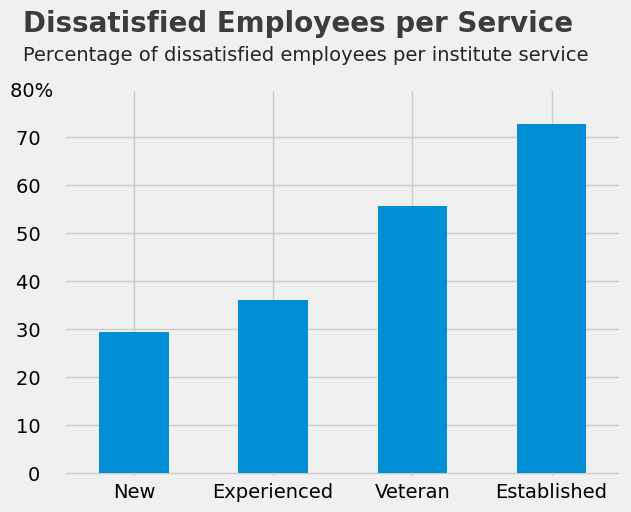

In [57]:
fte = ordered_dis_pct.plot(kind="bar", xlabel="", style="fivethirtyeight", rot=0)
fte.set_ylim(bottom=-0.01, top=0.8)
fte.text(x = -0.8, y = 0.92, s = "Dissatisfied Employees per Service",
               fontsize = 20, weight = 'bold', alpha = .75)
fte.text(x = -0.8, y = 0.86,
               s = 'Percentage of dissatisfied employees per institute service',
              fontsize = 14, alpha = .85)
fte.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
fte.set_yticklabels(labels=["0   ", "10   ", "20   ", "30   ", "40   ", "50   ", "60   ", "70   ", "80% "])
plt.show()

The results apparently show a tendency into dissatisfaction on employees with a longer career path in these institutes. New employees resign with a satisfaction value around 30%, while Veteran and Established employees dissatisfaction rates go up from about 55% to 80%. From then on, it would be a matter of finding out the key factor causing said dissatisfactions.